In [121]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
spotify_data = pd.read_csv('Downloads/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv',encoding='latin1')

In [3]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
spotify_data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [9]:
spotify_data = spotify_data.drop(['TIDAL Popularity'],axis=1)

In [11]:
spotify_data['Release Date'] = pd.to_datetime(spotify_data['Release Date'])

In [13]:
needed_cols = ['Track Score',"Spotify Popularity",'Spotify Playlist Count',
               'YouTube Likes','TikTok Likes',
               'Pandora Track Stations','Apple Music Playlist Count',
               'Deezer Playlist Count', 'Amazon Playlist Count']

In [15]:
sam_cols = ["Apple Music Playlist Count","Deezer Playlist Count", "Deezer Playlist Reach", 
            "Amazon Playlist Count", "Pandora Streams","Pandora Track Stations", 
            "Shazam Counts"]

In [17]:
#Replacing NaN in columns where missing values are less in number with groupby of Artist or Album

In [19]:
for i in ["Deezer Playlist Reach","Pandora Streams","Pandora Track Stations", "Shazam Counts"]:
    spotify_data[i] = spotify_data[i].str.replace(',','').replace(np.nan,0).astype('int')

In [21]:
for i in ["Apple Music Playlist Count","Deezer Playlist Count","Amazon Playlist Count"]:
    spotify_data[i] = spotify_data[i].replace(0, np.nan)
    spotify_data[i] = spotify_data[i].fillna(spotify_data.groupby('Artist')[i].transform('mean'))

In [23]:
for i in ["Deezer Playlist Reach","Pandora Streams","Pandora Track Stations"]:
    spotify_data[i] = spotify_data[i].replace(0, np.nan)
    spotify_data[i] = spotify_data[i].fillna(spotify_data.groupby('Album Name')[i].transform('mean'))

In [33]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   object        
 8   Spotify Playlist Count      4530 non-null   object        
 9   Spotify Playlist Reach      4528 non-null   object        
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

In [ ]:
#Columns still have missing data even with groupby replacements, let's see what's the issue

In [25]:
(pd.isna(spotify_data.groupby('Artist')["Apple Music Playlist Count"].mean()))

Artist
"XY"                                            True
$OHO BANI                                      False
$uicideboy$                                    False
&ME                                            False
(G)I-DLE                                       False
                                               ...  
ýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýý                False
ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý)               False
ýýýýýýýýýýýýýýýýýý                              True
ýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý     True
ýýýýýýýýýýýýýýýýýýýýýýýý                       False
Name: Apple Music Playlist Count, Length: 1999, dtype: bool

In [27]:
spotify_data[spotify_data['Artist'] == "ýýýýýýýýýýýýýýýýýý"]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
4273,ýýýýýýýýýýýýýýýýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýýýýýýýý - Single,ýýýýýýýýýýýýýýýýýý,2023-04-28,THSOH2302594,"4,222",20.5,"4,943,057","1,054","162,895",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13291,0


In [29]:
spotify_data[spotify_data['Artist'] == "ýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý"]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
1525,ýýýýýýýýýýýýýýýýýýýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý ýý...,ýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý,2023-09-18,THSOH2307725,"1,522",37.7,"456,034",14,138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2065,0


In [31]:
spotify_data[spotify_data['Artist'] == '"XY"']

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
2388,Come and Say - Original Mix,Relyt Conections 3,"""XY""",2022-11-14,ES98I2200881,"2,379",29.2,NaN,1,9,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [35]:
#They don't even have any values to calculate the mean

In [37]:
#Replacing them with median as the data is skewed

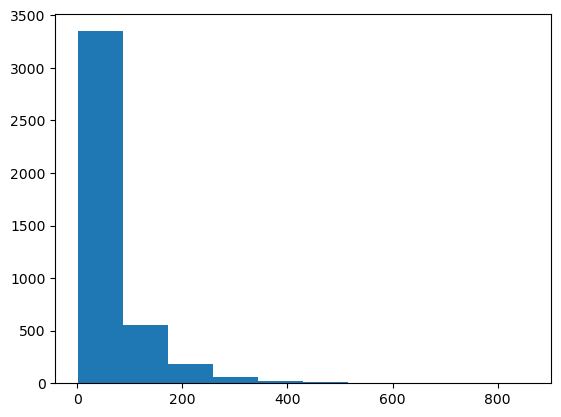

In [41]:
plt.hist(spotify_data["Apple Music Playlist Count"]);

In [43]:
for i in ["Apple Music Playlist Count","Deezer Playlist Count","Amazon Playlist Count","Deezer Playlist Reach"]:
    spotify_data[i] = spotify_data[i].replace(np.nan, spotify_data[i].median())

In [45]:
for i in ["Pandora Streams","Pandora Track Stations"]:
    spotify_data[i] = spotify_data[i].replace(np.nan, 0)

In [47]:
#selecting mon_cols from needed_cols for analysis

In [49]:
mon_cols = ["Spotify Playlist Count","YouTube Likes","TikTok Likes"]
for i in mon_cols:
    spotify_data[i] = spotify_data[i].str.replace(',','').replace(np.nan,0).astype('int')

In [51]:
for i in ["Spotify Playlist Count","YouTube Likes","TikTok Likes"]:
    spotify_data[i] = spotify_data[i].replace(0, spotify_data[i].median())

In [53]:
#final set of columns

In [55]:
contribute_df = spotify_data[['Track','Track Score','Spotify Playlist Count','YouTube Likes','TikTok Likes','Pandora Track Stations',
                              'Apple Music Playlist Count','Deezer Playlist Count', 'Amazon Playlist Count']]

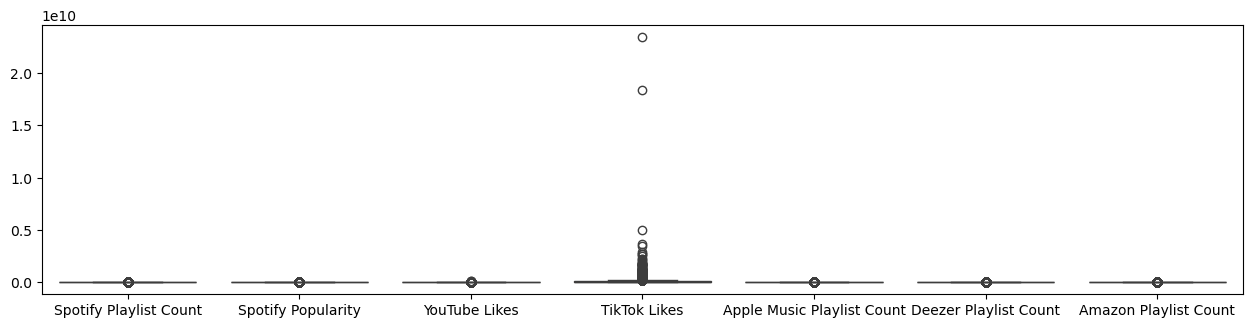

In [57]:
plt.subplots(figsize=(15.5, 3.5))
sns.boxplot(data=spotify_data[["Spotify Playlist Count","Spotify Popularity","YouTube Likes","TikTok Likes","Apple Music Playlist Count","Deezer Playlist Count","Amazon Playlist Count",]]);

In [59]:
#tiktok likes has a lot of outliers - so filtering the data

In [61]:
spotify_data["TikTok Likes"].describe()

count    4.600000e+03
mean     9.134715e+07
std      4.894411e+08
min      3.000000e+00
25%      9.401191e+06
50%      1.271789e+07
75%      6.721851e+07
max      2.347422e+10
Name: TikTok Likes, dtype: float64

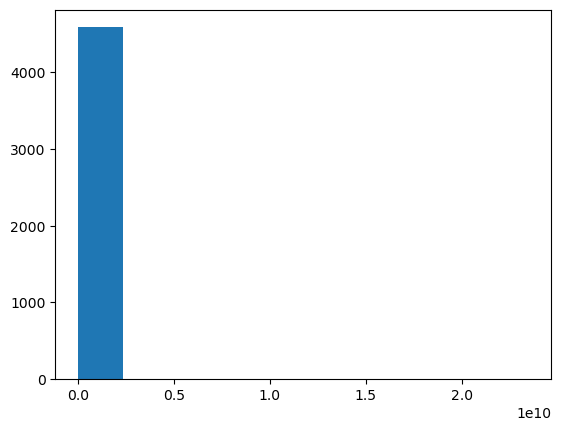

In [65]:
plt.hist(spotify_data["TikTok Likes"]);

<Axes: ylabel='Frequency'>

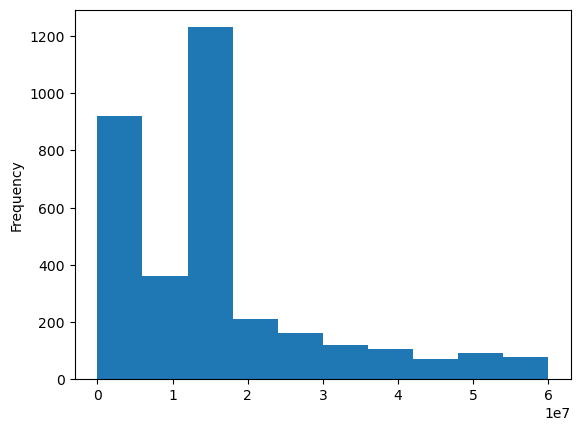

In [67]:
((spotify_data[spotify_data["TikTok Likes"] <= 60000000])['TikTok Likes']).plot(kind='hist')

In [69]:
filtered_df = spotify_data[spotify_data["TikTok Likes"] <= 60000000]

In [71]:
contribute_df = filtered_df[['Track','Track Score',"Spotify Popularity",'Spotify Playlist Count','YouTube Likes','TikTok Likes','Pandora Track Stations','Apple Music Playlist Count','Deezer Playlist Count', 'Amazon Playlist Count']]

In [73]:
contribute_df

,Track,Track Score,Spotify Popularity,Spotify Playlist Count,YouTube Likes,TikTok Likes,Pandora Track Stations,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count
1,Not Like Us,545.9,92.0,28113,3486739.0,35223547.0,28444.0,188.0,67.0,111.000000
4,Houdini,423.3,88.0,7223,3670188.0,12703314.5,7006.0,182.0,82.0,105.000000
6,Beautiful Things,407.2,86.0,73118,4120760.0,29584940.0,57372.0,280.0,168.0,154.000000
8,Danza Kuduro - Cover,355.7,NaN,1,1072084.5,12703314.5,0.0,28.0,15.0,17.000000
10,I Had Some Help (feat. Morgan Wallen),322.1,91.0,16219,550191.0,184500.0,21172.0,157.0,60.0,114.000000
...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,19.4,71.0,65770,1397590.0,20202000.0,13184.0,3.0,2.0,3.666667
4596,Dil Meri Na Sune,19.4,56.0,4602,5347766.0,1721.0,0.0,1.0,1.0,1.000000
4597,Grace (feat. 42 Dugg),19.4,65.0,72066,1081402.0,5288677.0,28999.0,19.0,1.0,6.000000
4598,Nashe Si Chadh Gayi,19.4,66.0,14037,3868828.0,2534831.0,0.0,1.0,1.0,7.000000


In [75]:
#Plotting 3351 songs popularity and their distribution can get messy so let's pick songs whose track score is >100

In [77]:
contribute_df[contribute_df['Track Score']>100]

,Track,Track Score,Spotify Popularity,Spotify Playlist Count,YouTube Likes,TikTok Likes,Pandora Track Stations,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count
1,Not Like Us,545.9,92.0,28113,3486739.0,35223547.0,28444.0,188.0,67.0,111.0
4,Houdini,423.3,88.0,7223,3670188.0,12703314.5,7006.0,182.0,82.0,105.0
6,Beautiful Things,407.2,86.0,73118,4120760.0,29584940.0,57372.0,280.0,168.0,154.0
8,Danza Kuduro - Cover,355.7,NaN,1,1072084.5,12703314.5,0.0,28.0,15.0,17.0
10,I Had Some Help (feat. Morgan Wallen),322.1,91.0,16219,550191.0,184500.0,21172.0,157.0,60.0,114.0
...,...,...,...,...,...,...,...,...,...,...
234,Favorite Song,101.4,62.0,45668,1670867.0,11127302.0,71027.0,43.0,4.0,9.0
235,Si No Quieres No,101.4,85.0,5423,889014.0,14500.0,3601.0,34.0,8.0,15.0
236,Mele Kalikimaka,101.3,NaN,52,1072084.5,12703314.5,0.0,28.0,15.0,17.0
238,Voz Emplumada del Monte,100.3,16.0,80,2113492.0,12703314.5,0.0,28.0,15.0,17.0


In [79]:
df_melted = contribute_df[contribute_df['Track Score']>100].melt(id_vars=["Track", 'Track Score','Spotify Popularity'], var_name="Category", value_name="Counts & Likes")
df_melted

,Track,Track Score,Spotify Popularity,Category,Counts & Likes
0,Not Like Us,545.9,92.0,Spotify Playlist Count,28113.0
1,Houdini,423.3,88.0,Spotify Playlist Count,7223.0
2,Beautiful Things,407.2,86.0,Spotify Playlist Count,73118.0
3,Danza Kuduro - Cover,355.7,NaN,Spotify Playlist Count,1.0
4,I Had Some Help (feat. Morgan Wallen),322.1,91.0,Spotify Playlist Count,16219.0
...,...,...,...,...,...
744,Favorite Song,101.4,62.0,Amazon Playlist Count,9.0
745,Si No Quieres No,101.4,85.0,Amazon Playlist Count,15.0
746,Mele Kalikimaka,101.3,NaN,Amazon Playlist Count,17.0
747,Voz Emplumada del Monte,100.3,16.0,Amazon Playlist Count,17.0


In [87]:
df_filtered = df_melted[(df_melted['Counts & Likes'] > 0)]

In [93]:
df_filtered = df_filtered[df_filtered['Spotify Popularity'].notnull()]

In [131]:
df_filtered.to_csv('EDA-Treemap.csv',index=False)

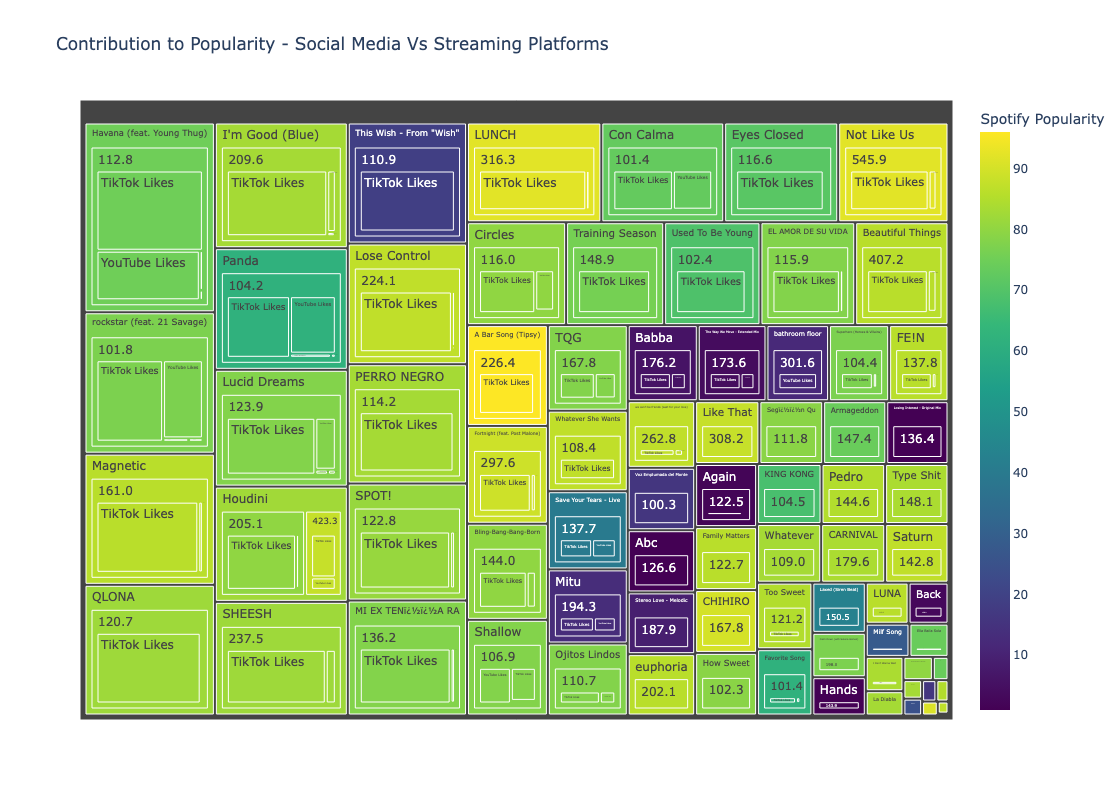

In [135]:
fig = px.treemap(df_filtered.dropna(), 
                 path=['Track', 'Track Score','Category'], 
                 values='Counts & Likes', 
                 color='Spotify Popularity',
                 color_continuous_scale='Viridis', 
                 title='Contribution to Popularity - Social Media Vs Streaming Platforms')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
)

fig.show()

In [137]:
fig.write_html("treemap_file.html")

In [ ]:
#Sankey diagram starting with media platform explicit vs non-explicit - streaming/social media/radio - their platforms

In [97]:
sankey_columns = ['Spotify Streams','Pandora Streams','Soundcloud Streams','YouTube Views','TikTok Views','AirPlay Spins','SiriusXM Spins']

In [99]:
for i in sankey_columns:
    try:
        spotify_data[i] = spotify_data[i].str.replace(',','').replace(np.nan,0).astype('int')
    except:
        spotify_data[i] = spotify_data[i].replace(',','').replace(np.nan,0).astype('int')

In [101]:
spotify_data[sankey_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Spotify Streams     4600 non-null   int64
 1   Pandora Streams     4600 non-null   int64
 2   Soundcloud Streams  4600 non-null   int64
 3   YouTube Views       4600 non-null   int64
 4   TikTok Views        4600 non-null   int64
 5   AirPlay Spins       4600 non-null   int64
 6   SiriusXM Spins      4600 non-null   int64
dtypes: int64(7)
memory usage: 251.7 KB


In [105]:
new_data = spotify_data[sankey_columns].copy()

In [107]:
new_data

,Spotify Streams,Pandora Streams,Soundcloud Streams,YouTube Views,TikTok Views,AirPlay Spins,SiriusXM Spins
0,390470936,18004655,4818457,84274754,5332281936,40975,684
1,323703884,7780028,6623075,116347040,208339025,40778,3
2,601309283,5022621,7208651,122599116,3369120610,74333,536
3,2031280633,190260277,0,1096100899,14603725994,1474799,2182
4,107034922,4493884,207179,77373957,0,12185,1
...,...,...,...,...,...,...,...
4595,305049963,20104066,50633006,149247747,143934379,6,0
4596,52282360,0,0,943920245,19935,412,0
4597,189972685,84426740,0,201027333,36849005,204,0
4598,145467020,6817840,0,1118595159,37757301,1200,0


In [109]:
for i in ['Pandora Streams','AirPlay Spins','SiriusXM Spins']:
    new_data[i] = new_data[i].replace(0, new_data[i].median())

In [113]:
filtered_df = new_data[new_data["TikTok Views"] <= 60000000]

In [115]:
new_data['Track'] = spotify_data['Track']
new_data['Album Name'] = spotify_data['Album Name']
new_data['Track Score'] = spotify_data['Track Score']
new_data['Explicit Track'] = spotify_data['Explicit Track']

In [117]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Spotify Streams     4600 non-null   int64  
 1   Pandora Streams     4600 non-null   float64
 2   Soundcloud Streams  4600 non-null   int64  
 3   YouTube Views       4600 non-null   int64  
 4   TikTok Views        4600 non-null   int64  
 5   AirPlay Spins       4600 non-null   int64  
 6   SiriusXM Spins      4600 non-null   int64  
 7   Track               4600 non-null   object 
 8   Album Name          4600 non-null   object 
 9   Track Score         4600 non-null   float64
 10  Explicit Track      4600 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 395.4+ KB


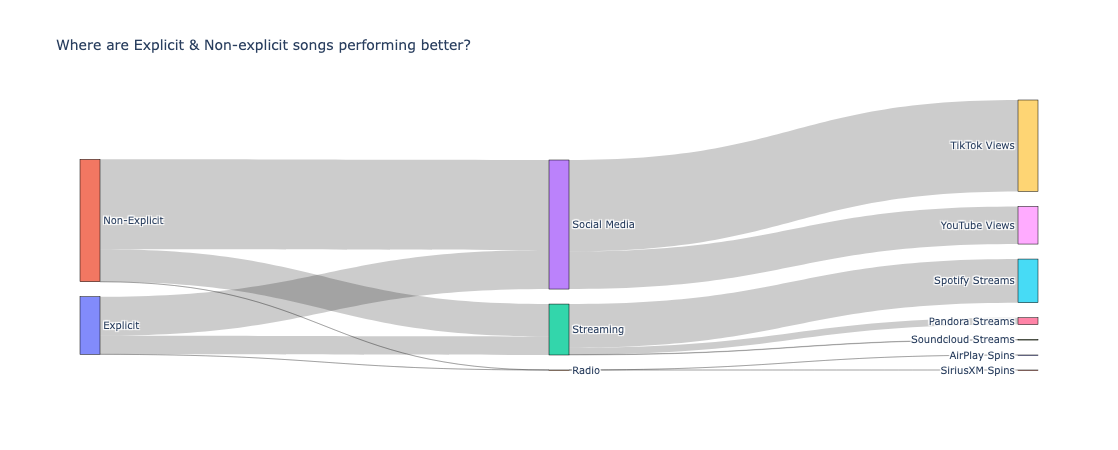

In [123]:
df = new_data.copy()

# Aggregating data
agg_data = {
    'Streaming': df[['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams']].sum().sum(),
    'Social Media': df[['YouTube Views', 'TikTok Views']].sum().sum(),
    'Radio': df[['AirPlay Spins', 'SiriusXM Spins']].sum().sum(),
    'Explicit': df[df['Explicit Track'] == 1][['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams', 'YouTube Views', 'TikTok Views', 'AirPlay Spins', 'SiriusXM Spins']].sum().sum(),
    'Non-Explicit': df[df['Explicit Track'] == 0][['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams', 'YouTube Views', 'TikTok Views', 'AirPlay Spins', 'SiriusXM Spins']].sum().sum()
}

# Nodes
nodes = ['Explicit', 'Non-Explicit', 'Streaming', 'Social Media', 'Radio', 
         'Spotify Streams', 'Pandora Streams', 'Soundcloud Streams', 'YouTube Views', 'TikTok Views', 'AirPlay Spins', 'SiriusXM Spins']

# Links
links = [
    {'source': nodes.index('Explicit'), 'target': nodes.index('Streaming'), 'value': df[df['Explicit Track'] == 1][['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams']].sum().sum()},
    {'source': nodes.index('Explicit'), 'target': nodes.index('Social Media'), 'value': df[df['Explicit Track'] == 1][['YouTube Views', 'TikTok Views']].sum().sum()},
    {'source': nodes.index('Explicit'), 'target': nodes.index('Radio'), 'value': df[df['Explicit Track'] == 1][['AirPlay Spins', 'SiriusXM Spins']].sum().sum()},
    {'source': nodes.index('Non-Explicit'), 'target': nodes.index('Streaming'), 'value': df[df['Explicit Track'] == 0][['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams']].sum().sum()},
    {'source': nodes.index('Non-Explicit'), 'target': nodes.index('Social Media'), 'value': df[df['Explicit Track'] == 0][['YouTube Views', 'TikTok Views']].sum().sum()},
    {'source': nodes.index('Non-Explicit'), 'target': nodes.index('Radio'), 'value': df[df['Explicit Track'] == 0][['AirPlay Spins', 'SiriusXM Spins']].sum().sum()},
    {'source': nodes.index('Streaming'), 'target': nodes.index('Spotify Streams'), 'value': df['Spotify Streams'].sum()},
    {'source': nodes.index('Streaming'), 'target': nodes.index('Pandora Streams'), 'value': df['Pandora Streams'].sum()},
    {'source': nodes.index('Streaming'), 'target': nodes.index('Soundcloud Streams'), 'value': df['Soundcloud Streams'].sum()},
    {'source': nodes.index('Social Media'), 'target': nodes.index('YouTube Views'), 'value': df['YouTube Views'].sum()},
    {'source': nodes.index('Social Media'), 'target': nodes.index('TikTok Views'), 'value': df['TikTok Views'].sum()},
    {'source': nodes.index('Radio'), 'target': nodes.index('AirPlay Spins'), 'value': df['AirPlay Spins'].sum()},
    {'source': nodes.index('Radio'), 'target': nodes.index('SiriusXM Spins'), 'value': df['SiriusXM Spins'].sum()},
]

# Create Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
    ))])

fig.update_layout(title_text="Where are Explicit & Non-explicit songs performing better?", font_size=10, width=1100, height=450)
fig.show()